In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [5]:
data=pd.read_csv('insurance.csv')

In [6]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
data.shape


(1338, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
data['sex']=data['sex'].map({'female':0,'male':1})
data['smoker']=data['smoker'].map({'no':0,'yes':1})
data['region']=data['region'].map({'southwest':100,'southeast':101,'northwest':102,'northeast':103})


In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,100,16884.92400
1,18,1,33.770,1,0,101,1725.55230
2,28,1,33.000,3,0,101,4449.46200
3,33,1,22.705,0,0,102,21984.47061
4,32,1,28.880,0,0,102,3866.85520


In [15]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,1,30.59,0,0,102,1639.5631


In [16]:
data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,100,16884.92400
1,18,1,33.770,1,0,101,1725.55230
2,28,1,33.000,3,0,101,4449.46200
3,33,1,22.705,0,0,102,21984.47061
4,32,1,28.880,0,0,102,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,102,10600.54830
1334,18,0,31.920,0,0,103,2205.98080
1335,18,0,36.850,0,0,101,1629.83350
1336,21,0,25.800,0,0,100,2007.94500


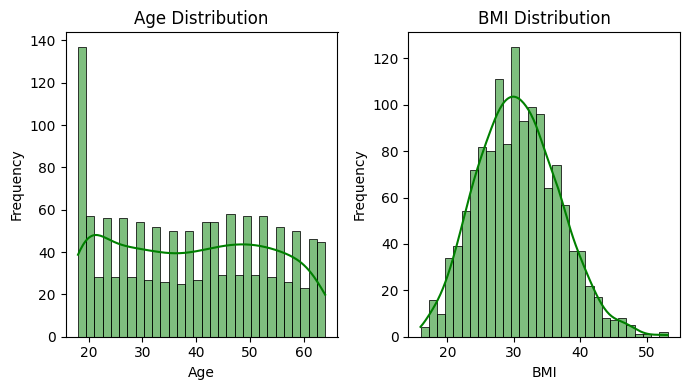

In [21]:
fig,axes = plt.subplots(1,2,figsize=(7,4))

sns.histplot(data['age'],bins=30,kde=True,ax=axes[0],color='green')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

sns.histplot(data['bmi'],bins=30,kde=True,ax=axes[1],color='green')
axes[1].set_title('BMI Distribution')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

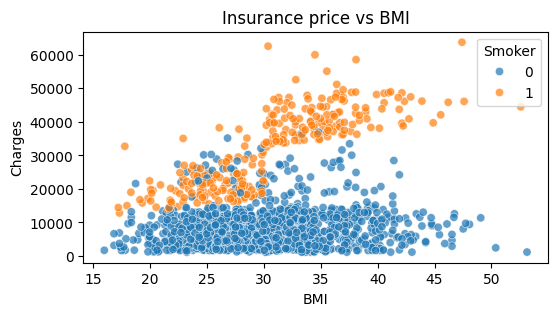

In [23]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=data,x='bmi',y='charges',hue='smoker',alpha=0.7)
plt.title('Insurance price vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker',loc='upper right')
plt.show()

In [27]:
# The above plot helps visualize how BMI relates to medical charges,and whether being a smoker affects that relationship. 
#You’ll typically see that smokers are charged more, often quite clearly separated from non-smokers.


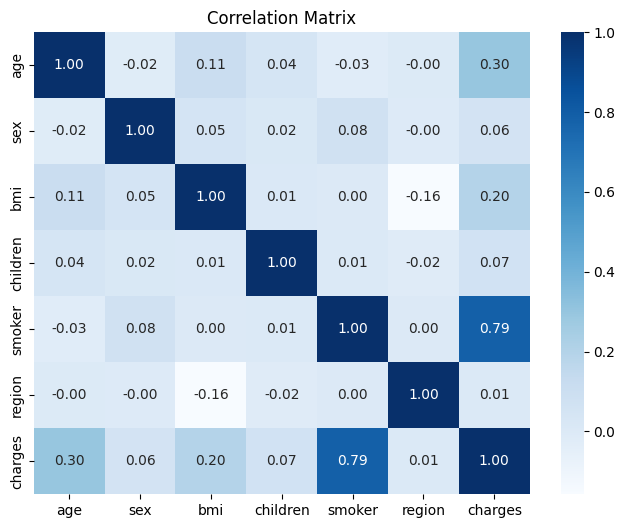

In [25]:
correlation_matrix=data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='Blues',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
           

In [26]:
data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [27]:
scaler= StandardScaler()
data[['age','bmi']]=scaler.fit_transform(data[['age','bmi']])

In [28]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,0,1,100,16884.92400
1,-1.509965,1,0.509621,1,0,101,1725.55230
2,-0.797954,1,0.383307,3,0,101,4449.46200
3,-0.441948,1,-1.305531,0,0,102,21984.47061
4,-0.513149,1,-0.292556,0,0,102,3866.85520


In [29]:
X=data.drop(['charges'],axis=1)
y=data['charges']

In [30]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
# Training the linear Regression model ,Decision tree Regressor, Random Forest Regressor

lr = LinearRegression()
lr.fit(X_train,y_train)

dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [33]:
y_lr_pred=lr.predict(X_test)
y_dtr_pred=dtr.predict(X_test)
y_rf_pred=rf.predict(X_test)

In [35]:
# Evaluating the Linear Regression model

mae_score= mean_absolute_error(y_test,y_lr_pred)
print(f"MAE score of Linear Regression:{mae_score:.2f}")

mse_score=mean_squared_error(y_test,y_lr_pred)
print(f"MSE score of Linear Regression:{mse_score:.2f}")

r2= r2_score(y_test,y_lr_pred)
print(f"r2_score of Linear Regression:{r2:.2f}")

MAE score of Linear Regression:4186.51
r2_score of Linear Regression:0.78
MSE score of Linear Regression:33635210.43


In [37]:
# Evaluating Decision Tree regressor model

mae_score=mean_absolute_error(y_test,y_dtr_pred)
print(f"MAE score of Decision Tree:{mae_score:.2f}")

mse_score=mean_squared_error(y_test,y_dtr_pred)
print(f"MSE score of Decision Tree:{mse_score:.2f}")

r2= r2_score(y_test,y_dtr_pred)
print(f"r2_score of Decision Tree:{r2:.2f}")





MAE score of Decision Tree:2883.38
MSE score of Decision Tree:39898140.69
r2_score of Decision Tree:0.74


In [38]:
# Evaluating Random Forest Regressor model

mae_score=mean_absolute_error(y_test,y_rf_pred)
print(f"MAE score of Random Forest Regressor:{mae_score:.2f}")

mse_score=mean_squared_error(y_test,y_rf_pred)
print(f"MSE score of Random Forest Regressor :{mse_score:.2f}")

r2= r2_score(y_test,y_rf_pred)
print(f"r2_score of Random Forest Regressor:{r2:.2f}")

MAE score of Random Forest Regressor:2426.68
MSE score of Random Forest Regressor :20495591.85
r2_score of Random Forest Regressor:0.87


In [ ]:
# Based on the model evaluation score I choose RandomForestRegressor model 

# Lowest MAE → Random Forest makes the smallest average error in absolute terms.

# Lowest MSE → It also has the lowest squared error, meaning fewer large outliers.

# Highest R² → It explains ~86.5% of the variance in the target variable — the best among the three.

In [39]:

# for predicting charges for a new customer I use best model among the three that is RandomForestRegressor
# here I use entire dataset (X,y)for training the model for getting more accuracy for new,unseen data

best_model=RandomForestRegressor(n_estimators=100,random_state=42)
best_model.fit(X,y)

RandomForestRegressor(random_state=42)

In [42]:
# Here is a new customer data

new_data={'age':25,'sex':1,'bmi':30.20,'children':4,'smoker':0,'region':1}

df_11=pd.DataFrame(new_data,index=[0])
df_11

,age,sex,bmi,children,smoker,region
0,25,1,30.2,4,0,1


In [43]:
# here our model predicts insurance charge for new customer

best_model.predict(df_11)

array([26977.5906091])